In [2]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 36.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 62.4 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 53.4 MB/s eta 0:00:0031m70.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 62.4 MB/s eta 0:00:0031m72.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 61.1 MB/s eta 0:00:00m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# Data Preparation and Preprocessing


In [12]:
df=pd.read_csv("insurance_data_02.csv")
df.head()

,age,affordability,income,health_status,dependents,occupation_risk,last_checkup_days,bought_insurance,health_Excellent,health_Good,health_Fair,health_Poor,occupation_Low,occupation_Medium,occupation_High
0,0.538462,1,0.111644,2,0.517502,0,1,0,0,0,1,0,0,NaN,NaN
1,0.711538,0,0.282838,2,0.884695,0,0,1,0,0,0,1,0,NaN,NaN
2,0.115385,1,0.327972,1,0.647220,1,0,0,1,0,1,0,0,NaN,NaN
3,0.173077,0,0.679607,2,0.129719,1,0,1,0,0,1,0,0,NaN,NaN
4,0.730769,0,0.051208,1,0.842141,0,0,0,1,0,0,1,0,NaN,NaN


In [13]:
# Checking Missing Values
print(df.isnull().sum())

age                     0
affordability           0
income                  0
health_status           0
dependents              0
occupation_risk         0
last_checkup_days       0
bought_insurance        0
health_Excellent        0
health_Good             0
health_Fair             0
health_Poor             0
occupation_Low          0
occupation_Medium    1000
occupation_High      1000
dtype: int64


In [14]:
# Print the columns of the DataFrame
print("Columns in DataFrame:", df.columns)

Columns in DataFrame: Index(['age', 'affordability', 'income', 'health_status', 'dependents',
       'occupation_risk', 'last_checkup_days', 'bought_insurance',
       'health_Excellent', 'health_Good', 'health_Fair', 'health_Poor',
       'occupation_Low', 'occupation_Medium', 'occupation_High'],
      dtype='object')


In [15]:
# Drop the columns with missing values
df = df.drop(columns=['occupation_Medium', 'occupation_High'])

In [16]:
df.head()

,age,affordability,income,health_status,dependents,occupation_risk,last_checkup_days,bought_insurance,health_Excellent,health_Good,health_Fair,health_Poor,occupation_Low
0,0.538462,1,0.111644,2,0.517502,0,1,0,0,0,1,0,0
1,0.711538,0,0.282838,2,0.884695,0,0,1,0,0,0,1,0
2,0.115385,1,0.327972,1,0.647220,1,0,0,1,0,1,0,0
3,0.173077,0,0.679607,2,0.129719,1,0,1,0,0,1,0,0
4,0.730769,0,0.051208,1,0.842141,0,0,0,1,0,0,1,0


In [27]:
# Separate features and target
X = df[['age', 'affordability']]
y = df['bought_insurance']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=25)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with age and affordability: {accuracy:.2f}")

# Get coefficients for age and affordability
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
print(coefficients)


Accuracy with age and affordability: 0.58
         feature  coefficient
0            age    -0.438393
1  affordability    -0.192967


# Implementing a basic neural network architecture

In [ ]:
Mymodel = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

Mymodel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Mymodel.fit(X_train, y_train, epochs=5000)

Epoch 1/5000
 1/25 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.3125 - loss: 1.0540

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.3516 - loss: 0.9995
Epoch 2/5000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.3863 - loss: 0.9444
Epoch 3/5000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - accuracy: 0.3767 - loss: 0.9493
Epoch 4/5000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.3700 - loss: 0.9404
Epoch 5/5000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - accuracy: 0.3638 - loss: 0.9438
Epoch 6/5000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - accuracy: 0.3476 - loss: 0.9264
Epoch 7/5000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.3734 - loss: 0.8968
Epoch 8/5000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - accuracy: 0.3815 - loss: 0.8655
Epoch 9/5000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.3858 - loss: 0.8501
Epoch 10/5000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.3654 - loss: 0.8677
Epoch 11/5000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.3664 - loss: 0.8485
Epoch 12/5000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s

In [20]:
Mymodel.evaluate(X_test,y_test)
Mymodel.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.6119 - loss: 0.6710
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.34694397],
       [0.37160444],
       [0.3971193 ],
       [0.41868284],
       [0.43616456],
       [0.41434237],
       [0.4033827 ],
       [0.41217706],
       [0.3949833 ],
       [0.4055337 ],
       [0.37369213],
       [0.3757845 ],
       [0.35918114],
       [0.34306568],
       [0.3884339 ],
       [0.3172477 ],
       [0.3634636 ],
       [0.3153166 ],
       [0.30197954],
       [0.44938323],
       [0.31339186],
       [0.30197954],
       [0.3329196 ],
       [0.30197954],
       [0.38014743],
       [0.34290847],
       [0.37369213],
       [0.3864801 ],
       [0.35934174],
       [0.44276378],
       [0.42085788],
       [0.3969523 ],
       [0.36760566],
       [0.37385538],
       [0.3969523 ],
       [0.33490577],
       [0.3329196 ],
       [0.3153166 ],
       [0.35303846],
       [0.39072335],
       [0.35116047],
       [0.30956167],
       [0.38631466],
       [0.38859963],
       [0.30575743],
       [0.36968407],
       [0.31918508],
       [0.407

In [21]:
y_test

688    0
49     0
288    0
698    1
775    0
      ..
410    0
344    0
135    1
735    1
591    1
Name: bought_insurance, Length: 200, dtype: int64

# Visualizing Results and Model Behavior

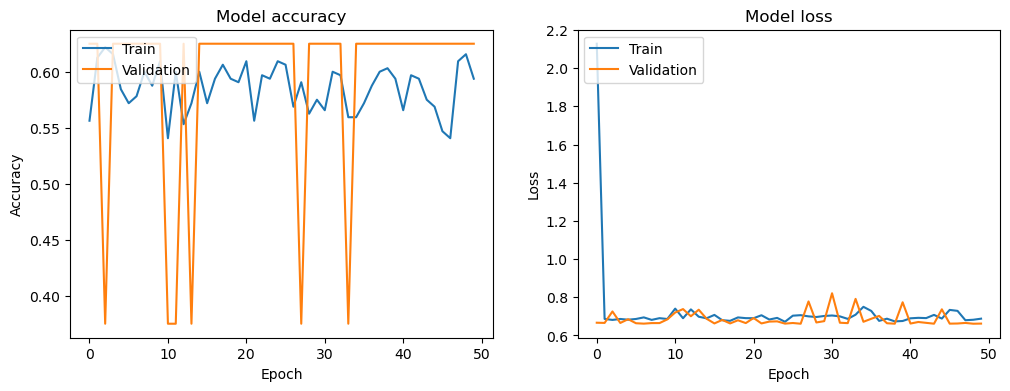

In [51]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [22]:
# Define the model with different activation functions
activation_functions = ['relu', 'tanh']

In [ ]:
Mymodel = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

Mymodel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Mymodel.fit(X_train, y_train, epochs=5000)

In [23]:
for activation in activation_functions:
    # Define the model
    model = keras.Sequential([
        keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation=activation),
        keras.layers.Dense(16, activation=activation),
        keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Test accuracy with activation function {activation}: {test_acc}')

Epoch 1/50


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4837 - loss: 0.6968 - val_accuracy: 0.6250 - val_loss: 0.6636
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.6249 - loss: 0.6568 - val_accuracy: 0.6250 - val_loss: 0.6619
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.6130 - loss: 0.6606 - val_accuracy: 0.6250 - val_loss: 0.6617
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.6520 - loss: 0.6415 - val_accuracy: 0.6250 - val_loss: 0.6619
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.6080 - loss: 0.6672 - val_accuracy: 0.6250 - val_loss: 0.6626
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.5912 - loss: 0.6728 - val_accuracy: 0.6250 - val_loss: 0.6627
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.6009 - loss: 0.6694 - val_accuracy: 0.6250 - val_loss: 0.6631
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.6062 - loss: 0.6589 - val_accuracy: 0.6250 - val_lo

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5599 - loss: 0.6796 - val_accuracy: 0.6250 - val_loss: 0.6674
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.6148 - loss: 0.6666 - val_accuracy: 0.6250 - val_loss: 0.6628
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.6496 - loss: 0.6427 - val_accuracy: 0.6250 - val_loss: 0.6631
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.6218 - loss: 0.6588 - val_accuracy: 0.6250 - val_loss: 0.6646
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.6526 - loss: 0.6449 - val_accuracy: 0.6250 - val_loss: 0.6637
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.6186 - loss: 0.6662 - val_accuracy: 0.6250 - val_loss: 0.6644
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.6514 - loss: 0.6368 - val_accuracy: 0.6250 - val_loss: 0.6652
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.6398 - loss: 0.6537 - val_accuracy: 0.6250 - val_lo

# Impact of Learning Rates

In [36]:
# Define a function to create and compile the model with a specific learning rate
def create_model_and_train(lr):
    model = keras.Sequential([
        keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    model_history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    return model_history, test_acc

# Define different learning rates to experiment with
learning_rates = [0.01, 0.1, 0.5, 0.001]

# Dictionary to store results
results = {}

# Evaluate each learning rate
for lr in learning_rates:
    history, test_acc = create_model_and_train(lr)
    results[f'LR_{lr}'] = {'history': history, 'test_acc': test_acc}

# Print and plot results
for lr, result in results.items():
    print(f'Test accuracy with learning rate {lr}: {result["test_acc"]:.4f}')


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwa

Test accuracy with learning rate LR_0.01: 0.5850
Test accuracy with learning rate LR_0.1: 0.5850
Test accuracy with learning rate LR_0.5: 0.5850
Test accuracy with learning rate LR_0.001: 0.5850


# Implement regularization techniques like L1 or L2 regularization

In [43]:
# Train the model with L2 regularization
model_nn_l2.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=0)

# Evaluate model performance
test_loss_nn_l2, test_acc_nn_l2 = model_nn_l2.evaluate(X_test, y_test)
print(f'Test accuracy with Neural Network and L2 regularization: {test_acc_nn_l2:.4f}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.6119 - loss: 0.6699
Test accuracy with Neural Network and L2 regularization: 0.5850


# Implement early stopping based on validation set performance.

In [42]:
# Define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history_nn_es = model_nn_es.fit(X_train, y_train, epochs=100, batch_size=10, 
                                validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Evaluate model performance
test_loss_nn_es, test_acc_nn_es = model_nn_es.evaluate(X_test, y_test)
print(f'Test accuracy with Neural Network and early stopping: {test_acc_nn_es:.4f}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.6119 - loss: 0.6721
Test accuracy with Neural Network and early stopping: 0.5850


# Experiment with different optimization algorithms (e.g., SGD, Adam, RMSprop)

In [49]:
optimizers = ['sgd', 'adam', 'rmsprop']

results_optimizers = {}

for optimizer_name in optimizers:
    model_nn_opt = keras.Sequential([
        keras.layers.Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model_nn_opt.compile(optimizer=optimizer_name,
                         loss='binary_crossentropy',
                         metrics=['accuracy'])
    
    history_opt = model_nn_opt.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=0)
    
    # Evaluate the model
    test_loss_opt, test_acc_opt = model_nn_opt.evaluate(X_test, y_test)
    
    results_optimizers[optimizer_name] = {'test_loss': test_loss_opt, 'test_acc': test_acc_opt}

# Print results
for optimizer_name, result in results_optimizers.items():
    print(f'Test accuracy with {optimizer_name}: {result["test_acc"]:.4f}')


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.6119 - loss: 0.6730


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.6119 - loss: 0.6713


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.6119 - loss: 0.6763
Test accuracy with sgd: 0.5850
Test accuracy with adam: 0.5850
Test accuracy with rmsprop: 0.5850


# Implement a method to interpret the model's decisions, such as SHAP values.

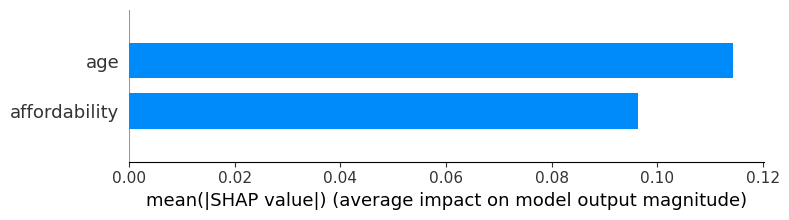

In [48]:
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type='bar')
